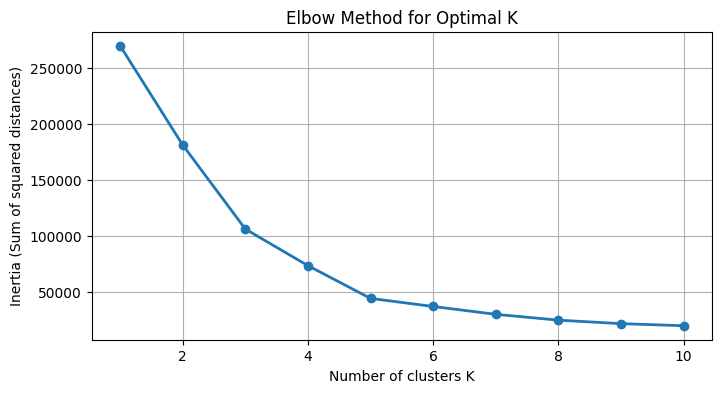

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


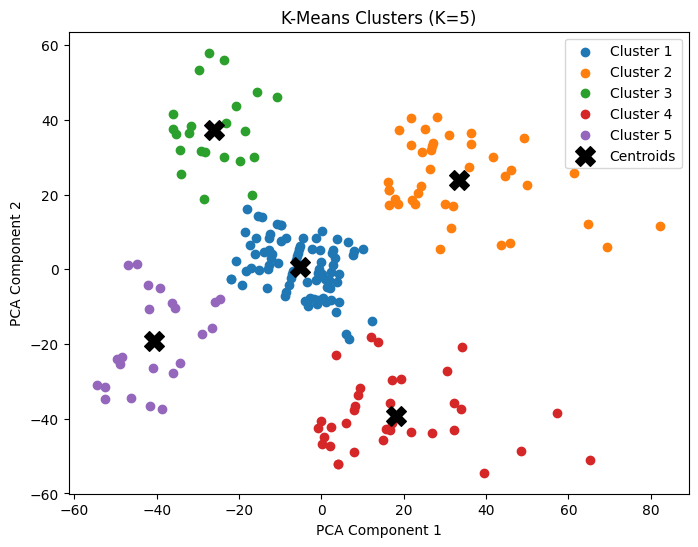

Silhouette Score for K=5: 0.554


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


df = pd.read_csv('/content/Mall_Customers.csv')

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]


pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)


inertia = []
K_range = range(1, 11)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X)
    inertia.append(km.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, 'o-', linewidth=2, markersize=6)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters K')
plt.ylabel('Inertia (Sum of squared distances)')
plt.grid(True)
plt.show()


optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
labels = kmeans.fit_predict(X)


plt.figure(figsize=(8, 6))
for cluster in range(optimal_k):
    plt.scatter(
        X_pca[labels == cluster, 0],
        X_pca[labels == cluster, 1],
        label=f'Cluster {cluster+1}'
    )

centroids_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(
    centroids_pca[:, 0],
    centroids_pca[:, 1],
    s=200, c='black', marker='X',
    label='Centroids'
)
plt.title(f'K-Means Clusters (K={optimal_k})')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


sil_score = silhouette_score(X, labels)
print(f'Silhouette Score for K={optimal_k}: {sil_score:.3f}')
